In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
mpl.rcParams.update(params)
plt.jet()

method="Forest"
classes=np.array(['Peaks','Filaments','Sheets','Voids'])
np.set_printoptions(precision=4)

In [2]:
path="../.."

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import pickle

In [4]:
cuts = np.array([-18,-16,-14,-12])  # Cuts in r_abs
cuts_dict = {'-22':'1', '-20':'2', '-18':'3', '-16':'4', '-14':'5', '-12':'6' }            #cuts in r_abs
lambdas = [0.0,0.1,0.2,0.3,0.4,0.5]        #lambda_th
smooths = [0.5,1,1.5,2,2.5]                         #Smooth
n_estimators = np.arange(10,110,10).astype(int)
# print(n_estimators)
beta = 1
MD = 10

# AUC_av = []
F1=[] # F1 score average
F1w=[] # F1 score average
F1_peak=[] # F1 score average
F1_fila=[] # F1 score average
F1_sheet=[] # F1 score average
F1_void=[] # F1 score average
G = []
C = [] #Confussion Matrix
L=[]   # lambda_th
R=[]   # cut in r_abs
S=[]   # smooth
NE=[]  # number of estimators

pbar = tqdm(total=len(smooths)*len(lambdas)*len(cuts)*len(n_estimators))
for ss in smooths:
    for ll in lambdas:
        for cc in cuts:
            ck = cuts_dict[str(cc)]

            print("Predicting Cosmic Web for lambda_th:"+str(ll)+" Mr<"+str(cc)+" sigma:"+str(ss))

            #------------------------ Reading B-skeleton catalog created with BSK_TNG.ipynb beta=1
            trainfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_train.csv'.format(ck,ll,ss)
            print(trainfilename)
            df_train = pd.read_csv(trainfilename)
            validfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_valid.csv'.format(ck,ll,ss)
            print(validfilename)
            df_valid = pd.read_csv(validfilename)
            
            X_columns = ['nc','ad','den','Dnc','Dad','Dden']
            Y_columns = ['env']
            
            Xx_train=np.array(df_train[X_columns])
            Xx_valid=np.array(df_valid[X_columns])
            Yy_train=np.array(df_train[Y_columns])
            Yy_valid=np.array(df_valid[Y_columns])

#            fig=plt.figure(figsize=(20,30))
            j = 1 
            for ne in n_estimators:
                clf = RandomForestClassifier(max_depth=MD,n_estimators=ne)
                clf.fit(Xx_train,Yy_train)
                modelfilename = path+'/bsk_data/TNG/model-'+method+'_sgm'+str(ss)+'_lth'+str(ll)+'_Mr'+str(cc)+'_ne'+str(ne)+'.sav'
                pickle.dump(clf, open(modelfilename, 'wb'))
                print('Model saved in '+modelfilename)
                              
                Yy_pred=clf.predict(Xx_valid)  

                yt=np.array(Yy_valid).ravel()
                yp=np.array(Yy_pred).ravel()
                g=yt[yt==yp]                           

                G.append(len(g)/len(yt))

                F1_peak.append(f1_score(Yy_valid, Yy_pred, average=None)[0])
                F1_fila.append(f1_score(Yy_valid, Yy_pred, average=None)[1])
                F1_sheet.append(f1_score(Yy_valid, Yy_pred, average=None)[2])
                F1_void.append(f1_score(Yy_valid, Yy_pred, average=None)[3])
                F1.append(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
                F1w.append(f1_score(Yy_valid, Yy_pred, average='weighted'))
                C.append(confusion_matrix(Yy_valid, Yy_pred))
                L.append(ll)
                R.append(cc)
                S.append(ss)
                NE.append(ne)
                j +=1
                pbar.update(1)
#            plt.show()
pbar.close()

Predicting Cosmic Web for lambda_th:0.0 Mr<-18 sigma:0.5
../../bsk_data/TNG/data_mock_Cr3_lth0.0_sm0.5_train.csv
../../bsk_data/TNG/data_mock_Cr3_lth0.0_sm0.5_valid.csv
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne10.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne20.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne30.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne40.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne50.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne60.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne70.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne80.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne90.sav
Model saved in ../../bsk_data/TNG/model-Forest_sgm0.5_lth0.0_Mr-18_ne100.sav
Predicting Cosmic Web for lambda_th:0.0 Mr<-16 sigma:0.5
../../bsk_dat

In [5]:
#AUC_av = np.array(AUC_av)
F1 = np.array(F1)
F1w = np.array(F1w)
F1_peak = np.array(F1_peak)
F1_fila = np.array(F1_fila)
F1_sheet = np.array(F1_sheet)
F1_void = np.array(F1_void)
C = np.array(C)
L = np.array(L)
R = np.array(R)
G = np.array(G)
S = np.array(S)
NE = np.array(NE)

filename = './Results/features_prediction_'+str(method)+'_box.hdf5'
h5f = h5py.File(filename, 'w')
h5f.create_dataset('F1', data=np.array(F1))
h5f.create_dataset('F1w', data=np.array(F1w))
h5f.create_dataset('F1_peak', data=np.array(F1_peak))
h5f.create_dataset('F1_fila', data=np.array(F1_fila))
h5f.create_dataset('F1_sheet', data=np.array(F1_sheet))
h5f.create_dataset('F1_void', data=np.array(F1_void))
h5f.create_dataset('C', data=np.array(C))
h5f.create_dataset('L', data=np.array(L))
h5f.create_dataset('R', data=np.array(R))
h5f.create_dataset('S', data=np.array(S))
h5f.create_dataset('NE', data=np.array(NE))
#h5f.create_dataset('AUC', data=np.array(AUC_av))
h5f.create_dataset('G', data=np.array(G))
h5f.close() 

<KeysViewHDF5 ['C', 'F1', 'F1_fila', 'F1_peak', 'F1_sheet', 'F1_void', 'F1w', 'G', 'L', 'NE', 'R', 'S']>
(1200,)
(1200,)


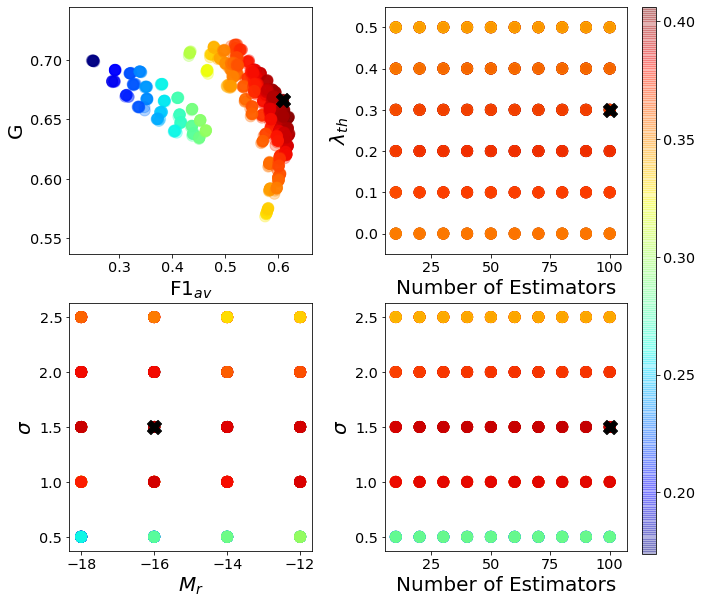

0.6089897310756889


In [6]:
def plot_xy(data, x, y, xlabel, ylabel, ii):
    cc = plt.scatter(data[x], data[y], c=data['G']*data['F1'], s=120, alpha=0.3)
    plt.scatter(data[x][ii], data[y][ii], color='black' , s=200 , marker="X")
    plt.xlabel(xlabel,size=20)
    plt.ylabel(ylabel,size=20)
    return plt, cc

filename = './Results/features_prediction_'+str(method)+'_box.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
data = {}
for k in f.keys():
    data[k] = f[k][...]
f.close()


fig = plt.figure(figsize=(10,10))
plt.jet()

print(data['G'].shape)
print(data['F1'].shape)

ii = np.argmax(data['G']*data['F1'])
#ii = (data['G']>0.5625) & (data['F1']>0.5325)


plt.subplot(2,2,1)
plt, cc = plot_xy(data, 'F1', 'G', r'F1$_{av}$', r'G', ii)


plt.subplot(2,2,3)
plot_xy(data, 'R', 'S', r'$M_{r}$', r'$\sigma$' , ii)

plt.subplot(2,2,2)
plot_xy(data, 'NE', 'L', r'Number of Estimators' , r'$\lambda_{th}$' , ii)

plt.subplot(2,2,4)
plot_xy(data, 'NE', 'S', r'Number of Estimators', r'$\sigma$',  ii)

plt.subplots_adjust(wspace = 0.3)
cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.76])# left, bottom, width, height
cbar = plt.colorbar(cc, cax=cbar_ax)

#plt.savefig("../Figures/TNG/Fig8_"+str(method)+".pdf",rasterized=True, transparent=True, bbox='tight')
#plt.savefig("../Figures/TNG/Fig8_"+str(method)+".png",rasterized=True, transparent=True, bbox='tight')
plt.show()

print(data['F1'][ii])

# Confusion Matrix and feature importance for best parameters

Predicting Cosmic Web for lambda_th:0.1 Mr<-14 sigma:1.5
../../bsk_data/TNG/data_mock_Cr5_lth0.1_sm1.5_train.csv
../../bsk_data/TNG/data_mock_Cr5_lth0.1_sm1.5_valid.csv
0.557
0.687
0.733
0.613
0.195
34


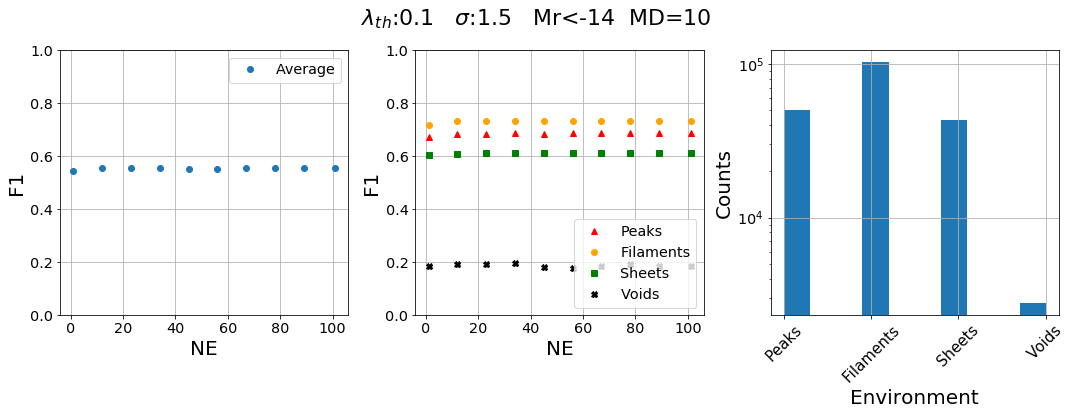

0.554213507738539
0.6853106401913343
0.7332965821389196
0.6141124716233224
0.18413433700057905


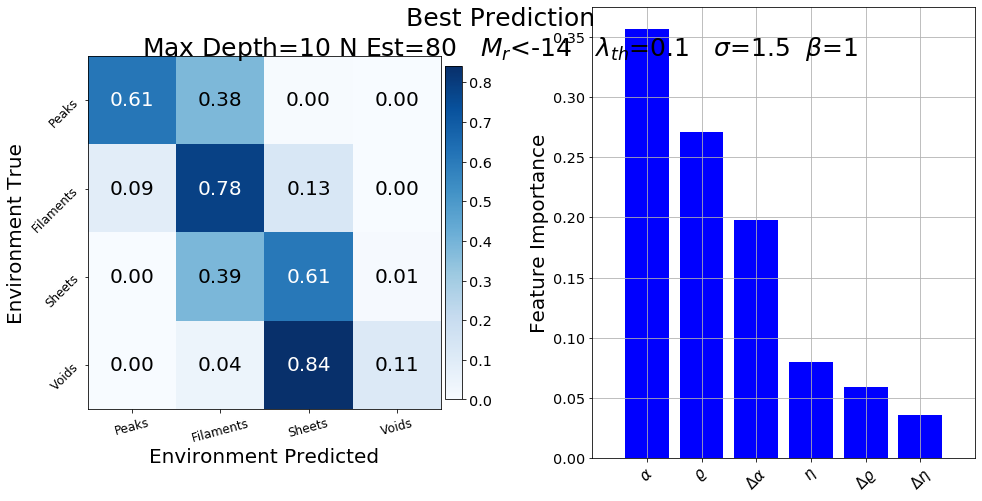

0.5548486457707827
0.6853379826538885
0.7331011541571713
0.6137263217415889
0.18722912453048254


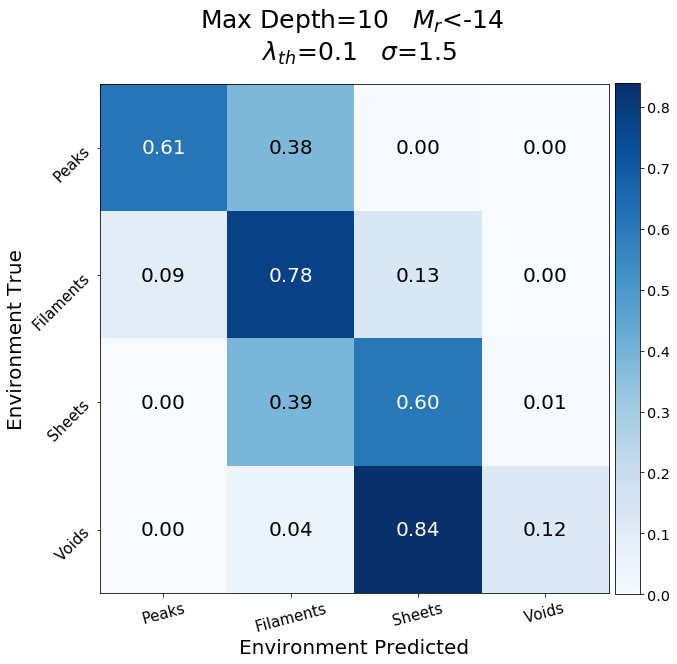

0.5548486457707827
0.6853379826538885
0.7331011541571713
0.6137263217415889
0.18722912453048254


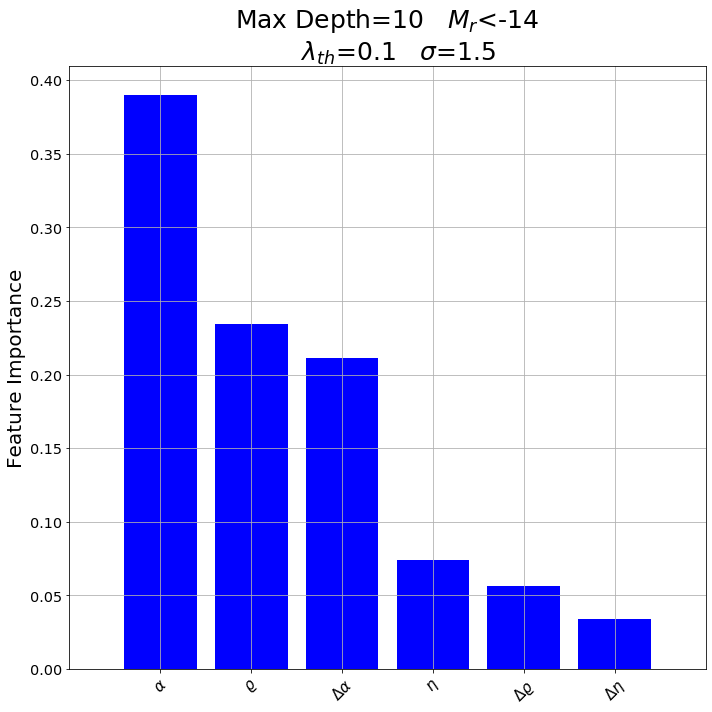

In [7]:
cuts=[-22,-20,-18,-16,-14,-12]               #cuts in r_abs
lambda_th = [0.0,0.1,0.2,0.3,0.4,0.5]        #lambda_th
cuts_dict = {'-22':'1', '-20':'2', '-18':'3', '-16':'4', '-14':'5', '-12':'6' }            #cuts in r_abs
smooth=[0.5,1,1.5,2,2.5]                         #Smooth
n_estimators=np.linspace(1,101,10).astype(int)
MD = 10

#--------------- Best parameters
lambda_th=[0.1]
smooth=[1.5]
NE = 80
cmap=plt.cm.Blues

pbar = tqdm(total=len(smooth)*len(lambda_th)*len(n_estimators))
for ss in smooth:
    for ll in lambda_th:
        fig=plt.figure(figsize=(15,20))
        j = 0
        for cc in cuts[4:5]:
            ck = cuts_dict[str(cc)]
            
            print("Predicting Cosmic Web for lambda_th:"+str(ll)+" Mr<"+str(cc)+" sigma:"+str(ss))

            #------------------------ Reading B-skeleton catalog created with BSK_TNG.ipynb beta=1
            trainfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_train.csv'.format(ck,ll,ss)
            print(trainfilename)
            df_train = pd.read_csv(trainfilename)
            validfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_valid.csv'.format(ck,ll,ss)
            print(validfilename)
            df_valid = pd.read_csv(validfilename)
            
            X_columns = ['nc','ad','den','Dnc','Dad','Dden']
            Y_columns = ['env']
            
            Xx_train=np.array(df_train[X_columns])
            Xx_valid=np.array(df_valid[X_columns])
            Yy_train=np.array(df_train[Y_columns])
            Yy_valid=np.array(df_valid[Y_columns])


            f1s_av=[]
            f1s_peak=[]
            f1s_fila=[]
            f1s_sheet=[]
            f1s_void=[]
            for ne in n_estimators: 
                clf = RandomForestClassifier(max_depth=MD,n_estimators=ne)
                clf.fit(Xx_train,Yy_train)
                Yy_pred=clf.predict(Xx_valid)  
                f1s_av.append(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
                f1s_peak.append(f1_score(Yy_valid, Yy_pred, average=None)[0])
                f1s_fila.append(f1_score(Yy_valid, Yy_pred, average=None)[1])
                f1s_sheet.append(f1_score(Yy_valid, Yy_pred, average=None)[2])
                f1s_void.append(f1_score(Yy_valid, Yy_pred, average=None)[3])      

                pbar.update(1)

            f1s_av=np.array(f1s_av)
            f1s_peak=np.array(f1s_peak)
            f1s_fila=np.array(f1s_fila)
            f1s_sheet=np.array(f1s_sheet)
            f1s_void=np.array(f1s_void)
            
            ii = np.argmax(f1s_av) #max f1 average score
            print(round(f1s_av[ii],3))
            print(round(f1s_peak[ii],3))
            print(round(f1s_fila[ii],3))
            print(round(f1s_sheet[ii],3))
            print(round(f1s_void[ii],3))
            print(n_estimators[ii])

            ax = fig.add_subplot(4,3,1+j)
            major_ticks = np.arange(0, 30, 10)
            plt.grid()
            plt.plot(n_estimators,f1s_av,"o",label="Average")
            plt.legend()
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.ylim(0,1)

            ax = fig.add_subplot(4,3,2+j)
            plt.plot(n_estimators,f1s_peak,"^",label="Peaks", c="red")
            plt.plot(n_estimators,f1s_fila,"o",label="Filaments", c="orange")
            plt.plot(n_estimators,f1s_sheet,"s",label="Sheets",c="green")
            plt.plot(n_estimators,f1s_void,"X",label="Voids",c="black")
            plt.legend()
            plt.grid()
            plt.ylim(0,1)
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.tight_layout()

            ax = fig.add_subplot(4,3,3+j)
            _=plt.hist(Yy_valid)
            _=plt.xticks(np.arange(4),classes, rotation=45, size=15)        
            _=plt.xlabel("Environment",size=20)
            _=plt.ylabel("Counts",size=20)
            _=plt.yscale("log")
            _=plt.grid()
            _=plt.tight_layout()
            
            j += 3
            
        fig.suptitle("$\lambda_{th}$:"+str(ll)+"   $\sigma$:"+str(ss)+"   Mr<-14  MD=10",size=22)
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
        plt.savefig("../Figures/TNG/p_F1_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(14,7))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,2,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.74)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)

            plt.setp(ax.get_xticklabels(), rotation=15, size=12)
            plt.setp(ax.get_yticklabels(), rotation=45, size=12)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,2,2,aspect=22,rasterized=True)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])

        fig.suptitle('Best Prediction\nMax Depth='+str(MD)+' N Est='+str(NE)+'   $M_{r}$<'+str(cc)+'   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss)+'  $\\beta$=1',size=25)
        fig.subplots_adjust(top=0.97)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True)
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,1,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.76)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)
            fig.suptitle('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'  \n $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)

            plt.setp(ax.get_xticklabels(), rotation=15, size=15)
            plt.setp(ax.get_yticklabels(), rotation=45, size=15)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")


        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,1,1)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.title('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'\n   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])
            
        fig.subplots_adjust(top=0.9)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_FI_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

Predicting Cosmic Web for lambda_th:0.1 Mr<-14 sigma:1.5
../../bsk_data/TNG/data_mock_Cr5_lth0.1_sm1.5_train.csv
../../bsk_data/TNG/data_mock_Cr5_lth0.1_sm1.5_valid.csv
0.558
0.687
0.733
0.61
0.204
45


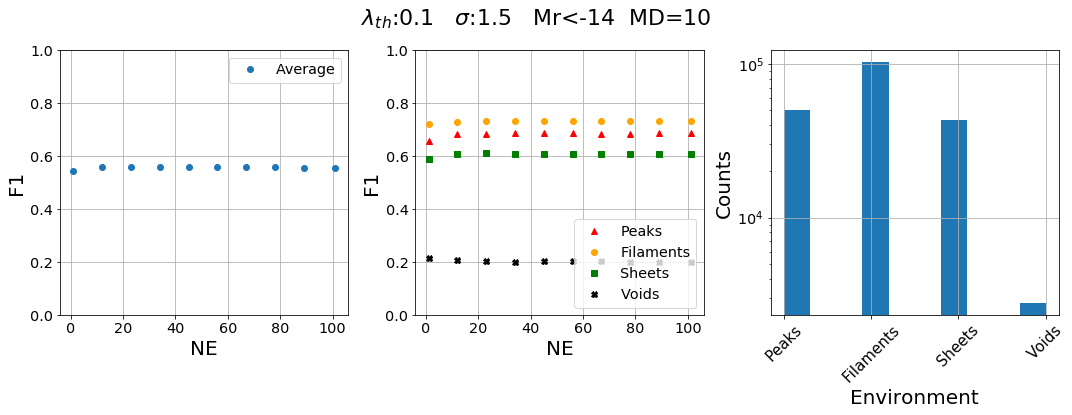

0.5577348729398592
0.6864201872774433
0.7332351551353162
0.6093501334194875
0.20193401592718999


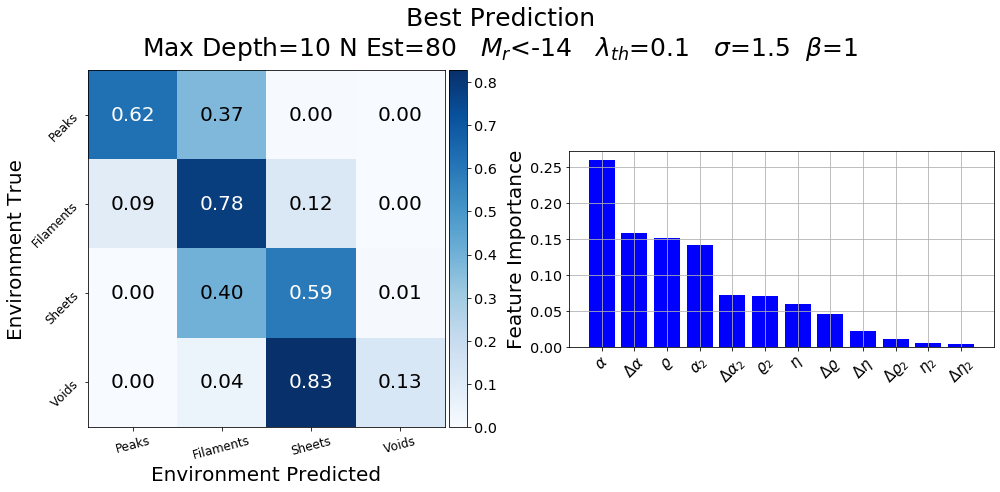

0.5577348729398592
0.6864201872774433
0.7332351551353162
0.6093501334194875
0.20193401592718999


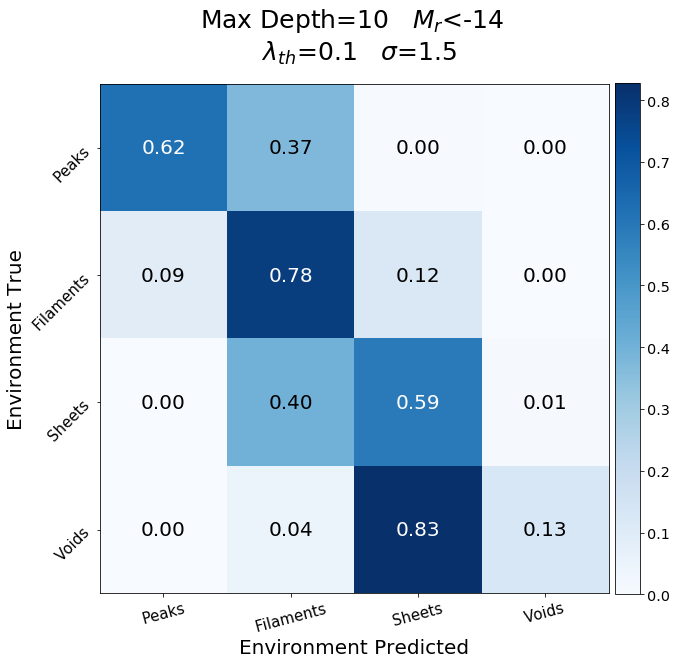

0.5577348729398592
0.6864201872774433
0.7332351551353162
0.6093501334194875
0.20193401592718999


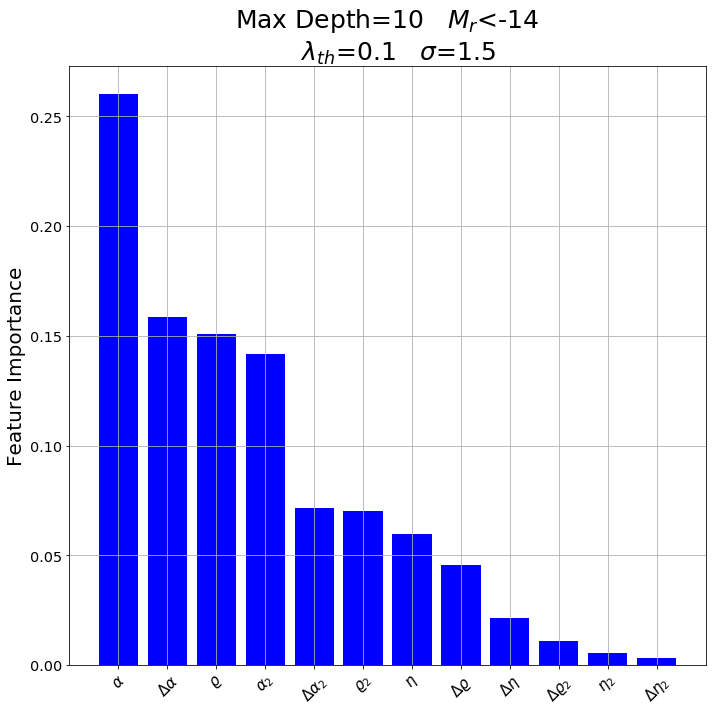

In [8]:
cuts=[-22,-20,-18,-16,-14,-12]               #cuts in r_abs
lambda_th = [0.0,0.1,0.2,0.3,0.4,0.5]        #lambda_th
cuts_dict = {'-22':'1', '-20':'2', '-18':'3', '-16':'4', '-14':'5', '-12':'6' }            #cuts in r_abs
smooth=[0.5,1,1.5,2,2.5]                         #Smooth
n_estimators=np.linspace(1,101,10).astype(int)
MD = 10

#--------------- Best parameters
lambda_th=[0.1]
smooth=[1.5]
NE = 80
cmap=plt.cm.Blues

pbar = tqdm(total=len(smooth)*len(lambda_th)*len(n_estimators))
for ss in smooth:
    for ll in lambda_th:
        fig=plt.figure(figsize=(15,20))
        j = 0
        for cc in cuts[4:5]:
            ck = cuts_dict[str(cc)]
            
            print("Predicting Cosmic Web for lambda_th:"+str(ll)+" Mr<"+str(cc)+" sigma:"+str(ss))

            #------------------------ Reading B-skeleton catalog created with BSK_TNG.ipynb beta=1
            trainfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_train.csv'.format(ck,ll,ss)
            print(trainfilename)
            df_train = pd.read_csv(trainfilename)
            validfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_valid.csv'.format(ck,ll,ss)
            print(validfilename)
            df_valid = pd.read_csv(validfilename)
            
            X_columns = ['nc','ad','den','Dnc','Dad','Dden','nc2','ad2','den2','Dnc2','Dad2','Dden2']
            Y_columns = ['env']
            
            Xx_train=np.array(df_train[X_columns])
            Xx_valid=np.array(df_valid[X_columns])
            Yy_train=np.array(df_train[Y_columns])
            Yy_valid=np.array(df_valid[Y_columns])


            f1s_av=[]
            f1s_peak=[]
            f1s_fila=[]
            f1s_sheet=[]
            f1s_void=[]
            for ne in n_estimators: 
                clf = RandomForestClassifier(max_depth=MD,n_estimators=ne,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
                clf.fit(Xx_train,Yy_train)
                Yy_pred=clf.predict(Xx_valid)  
                f1s_av.append(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
                f1s_peak.append(f1_score(Yy_valid, Yy_pred, average=None)[0])
                f1s_fila.append(f1_score(Yy_valid, Yy_pred, average=None)[1])
                f1s_sheet.append(f1_score(Yy_valid, Yy_pred, average=None)[2])
                f1s_void.append(f1_score(Yy_valid, Yy_pred, average=None)[3])      

                pbar.update(1)

            f1s_av=np.array(f1s_av)
            f1s_peak=np.array(f1s_peak)
            f1s_fila=np.array(f1s_fila)
            f1s_sheet=np.array(f1s_sheet)
            f1s_void=np.array(f1s_void)
            
            ii = np.argmax(f1s_av) #max f1 average score
            print(round(f1s_av[ii],3))
            print(round(f1s_peak[ii],3))
            print(round(f1s_fila[ii],3))
            print(round(f1s_sheet[ii],3))
            print(round(f1s_void[ii],3))
            print(n_estimators[ii])

            ax = fig.add_subplot(4,3,1+j)
            major_ticks = np.arange(0, 30, 10)
            plt.grid()
            plt.plot(n_estimators,f1s_av,"o",label="Average")
            plt.legend()
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.ylim(0,1)

            ax = fig.add_subplot(4,3,2+j)
            plt.plot(n_estimators,f1s_peak,"^",label="Peaks", c="red")
            plt.plot(n_estimators,f1s_fila,"o",label="Filaments", c="orange")
            plt.plot(n_estimators,f1s_sheet,"s",label="Sheets",c="green")
            plt.plot(n_estimators,f1s_void,"X",label="Voids",c="black")
            plt.legend()
            plt.grid()
            plt.ylim(0,1)
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.tight_layout()

            ax = fig.add_subplot(4,3,3+j)
            _=plt.hist(Yy_valid)
            _=plt.xticks(np.arange(4),classes, rotation=45, size=15)        
            _=plt.xlabel("Environment",size=20)
            _=plt.ylabel("Counts",size=20)
            _=plt.yscale("log")
            _=plt.grid()
            _=plt.tight_layout()
            
            j += 3
            
        fig.suptitle("$\lambda_{th}$:"+str(ll)+"   $\sigma$:"+str(ss)+"   Mr<-14  MD=10",size=22)
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
        plt.savefig("../Figures/TNG/p_F1_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(14,7))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,2,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.74)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)

            plt.setp(ax.get_xticklabels(), rotation=15, size=12)
            plt.setp(ax.get_yticklabels(), rotation=45, size=12)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden',
                                    'nc2','ad2','den2','Dnc2','Dad2','Dden2']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$',
                         r'$\eta_2$',r'$\alpha_2$',r'$\varrho_2$',r'$\Delta \eta_2$',r'$\Delta \alpha_2$',r'$\Delta \varrho_2$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,2,2,aspect=22,rasterized=True)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])

        fig.suptitle('Best Prediction\nMax Depth='+str(MD)+' N Est='+str(NE)+'   $M_{r}$<'+str(cc)+'   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss)+'  $\\beta$=1',size=25)
        fig.subplots_adjust(top=0.97)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True)
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,1,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.76)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)
            fig.suptitle('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'  \n $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)

            plt.setp(ax.get_xticklabels(), rotation=15, size=15)
            plt.setp(ax.get_yticklabels(), rotation=45, size=15)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")


        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()


pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden',
                                    'nc2','ad2','den2','Dnc2','Dad2','Dden2']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$',
                         r'$\eta_2$',r'$\alpha_2$',r'$\varrho_2$',r'$\Delta \eta_2$',r'$\Delta \alpha_2$',r'$\Delta \varrho_2$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,1,1)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.title('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'\n   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])
            
        fig.subplots_adjust(top=0.9)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_FI_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

Predicting Cosmic Web for lambda_th:0.1 Mr<-14 sigma:1.5
../../bsk_data/TNG/data_mock_Cr5_lth0.1_sm1.5_train.csv
../../bsk_data/TNG/data_mock_Cr5_lth0.1_sm1.5_valid.csv
0.558
0.687
0.733
0.61
0.204
45


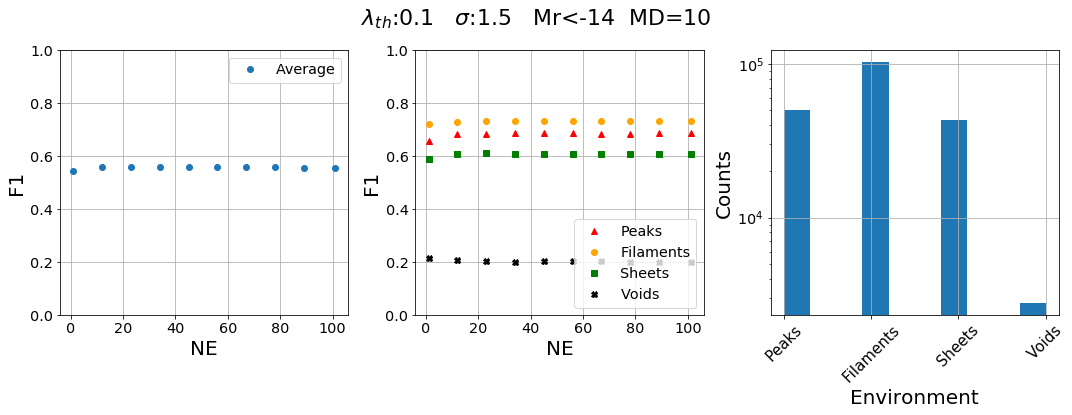

0.5577348729398592
0.6864201872774433
0.7332351551353162
0.6093501334194875
0.20193401592718999


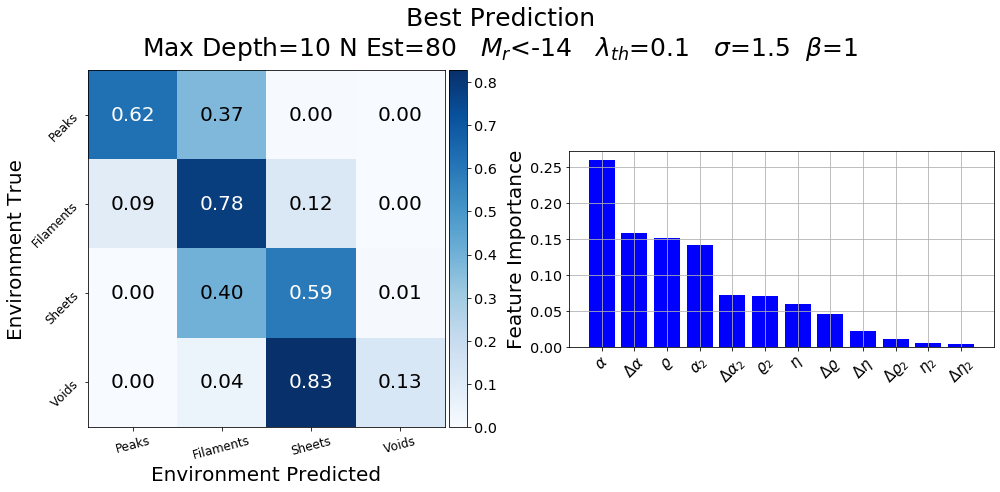

0.5577348729398592
0.6864201872774433
0.7332351551353162
0.6093501334194875
0.20193401592718999


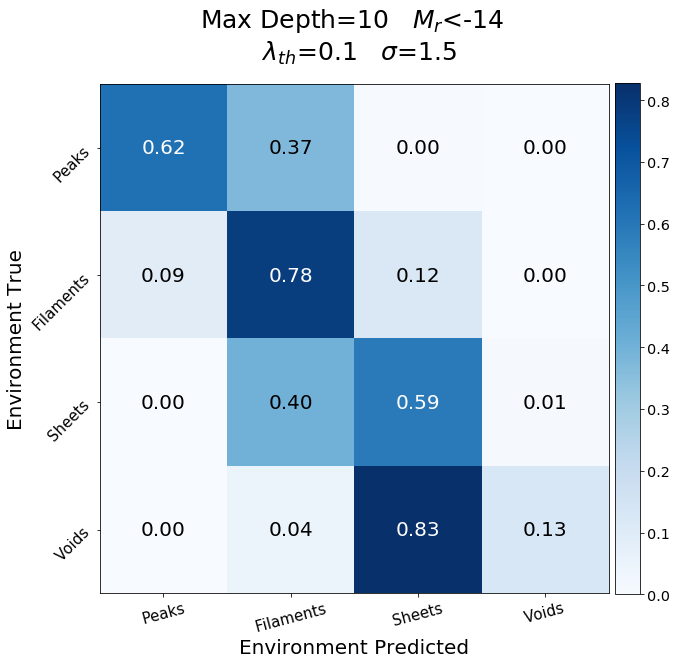

In [ ]:
cuts=[-22,-20,-18,-16,-14,-12]               #cuts in r_abs
lambda_th = [0.0,0.1,0.2,0.3,0.4,0.5]        #lambda_th
cuts_dict = {'-22':'1', '-20':'2', '-18':'3', '-16':'4', '-14':'5', '-12':'6' }            #cuts in r_abs
smooth=[0.5,1,1.5,2,2.5]                         #Smooth
n_estimators=np.linspace(1,101,10).astype(int)
MD = 10

#--------------- Best parameters
lambda_th=[0.1]
smooth=[1.5]
NE = 80
cmap=plt.cm.Blues

pbar = tqdm(total=len(smooth)*len(lambda_th)*len(n_estimators))
for ss in smooth:
    for ll in lambda_th:
        fig=plt.figure(figsize=(15,20))
        j = 0
        for cc in cuts[4:5]:
            ck = cuts_dict[str(cc)]
            
            print("Predicting Cosmic Web for lambda_th:"+str(ll)+" Mr<"+str(cc)+" sigma:"+str(ss))

            #------------------------ Reading B-skeleton catalog created with BSK_TNG.ipynb beta=1
            trainfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_train.csv'.format(ck,ll,ss)
            print(trainfilename)
            df_train = pd.read_csv(trainfilename)
            validfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_valid.csv'.format(ck,ll,ss)
            print(validfilename)
            df_valid = pd.read_csv(validfilename)
            
            X_columns = ['nc','ad','den','Dnc','Dad','Dden','nc2','ad2','den2','Dnc2','Dad2','Dden2']
            Y_columns = ['env']
            
            Xx_train=np.array(df_train[X_columns])
            Xx_valid=np.array(df_valid[X_columns])
            Yy_train=np.array(df_train[Y_columns])
            Yy_valid=np.array(df_valid[Y_columns])


            f1s_av=[]
            f1s_peak=[]
            f1s_fila=[]
            f1s_sheet=[]
            f1s_void=[]
            for ne in n_estimators: 
                clf = RandomForestClassifier(max_depth=MD,n_estimators=ne,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
                clf.fit(Xx_train,Yy_train)
                Yy_pred=clf.predict(Xx_valid)  
                f1s_av.append(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
                f1s_peak.append(f1_score(Yy_valid, Yy_pred, average=None)[0])
                f1s_fila.append(f1_score(Yy_valid, Yy_pred, average=None)[1])
                f1s_sheet.append(f1_score(Yy_valid, Yy_pred, average=None)[2])
                f1s_void.append(f1_score(Yy_valid, Yy_pred, average=None)[3])      

                pbar.update(1)

            f1s_av=np.array(f1s_av)
            f1s_peak=np.array(f1s_peak)
            f1s_fila=np.array(f1s_fila)
            f1s_sheet=np.array(f1s_sheet)
            f1s_void=np.array(f1s_void)
            
            ii = np.argmax(f1s_av) #max f1 average score
            print(round(f1s_av[ii],3))
            print(round(f1s_peak[ii],3))
            print(round(f1s_fila[ii],3))
            print(round(f1s_sheet[ii],3))
            print(round(f1s_void[ii],3))
            print(n_estimators[ii])

            ax = fig.add_subplot(4,3,1+j)
            major_ticks = np.arange(0, 30, 10)
            plt.grid()
            plt.plot(n_estimators,f1s_av,"o",label="Average")
            plt.legend()
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.ylim(0,1)

            ax = fig.add_subplot(4,3,2+j)
            plt.plot(n_estimators,f1s_peak,"^",label="Peaks", c="red")
            plt.plot(n_estimators,f1s_fila,"o",label="Filaments", c="orange")
            plt.plot(n_estimators,f1s_sheet,"s",label="Sheets",c="green")
            plt.plot(n_estimators,f1s_void,"X",label="Voids",c="black")
            plt.legend()
            plt.grid()
            plt.ylim(0,1)
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.tight_layout()

            ax = fig.add_subplot(4,3,3+j)
            _=plt.hist(Yy_valid)
            _=plt.xticks(np.arange(4),classes, rotation=45, size=15)        
            _=plt.xlabel("Environment",size=20)
            _=plt.ylabel("Counts",size=20)
            _=plt.yscale("log")
            _=plt.grid()
            _=plt.tight_layout()
            
            j += 3
            
        fig.suptitle("$\lambda_{th}$:"+str(ll)+"   $\sigma$:"+str(ss)+"   Mr<-14  MD=10",size=22)
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
        plt.savefig("../Figures/TNG/p_F1_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(14,7))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,2,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.74)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)

            plt.setp(ax.get_xticklabels(), rotation=15, size=12)
            plt.setp(ax.get_yticklabels(), rotation=45, size=12)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden',
                                    'nc2','ad2','den2','Dnc2','Dad2','Dden2',
                                   'nc3','ad3','den3','Dnc3','Dad3','Dden3']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$',
                         r'$\eta_2$',r'$\alpha_2$',r'$\varrho_2$',r'$\Delta \eta_2$',r'$\Delta \alpha_2$',r'$\Delta \varrho_2$',
                         r'$\eta_3$',r'$\alpha_3$',r'$\varrho_3$',r'$\Delta \eta_3$',r'$\Delta \alpha_3$',r'$\Delta \varrho_3$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,2,2,aspect=22,rasterized=True)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])

        fig.suptitle('Best Prediction\nMax Depth='+str(MD)+' N Est='+str(NE)+'   $M_{r}$<'+str(cc)+'   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss)+'  $\\beta$=1',size=25)
        fig.subplots_adjust(top=0.97)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True)
        plt.show()
        pbar.update(1)
pbar.close()


pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,1,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.76)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)
            fig.suptitle('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'  \n $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)

            plt.setp(ax.get_xticklabels(), rotation=15, size=15)
            plt.setp(ax.get_yticklabels(), rotation=45, size=15)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")


        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden',
                                    'nc2','ad2','den2','Dnc2','Dad2','Dden2',
                                   'nc3','ad3','den3','Dnc3','Dad3','Dden3']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$',
                         r'$\eta_2$',r'$\alpha_2$',r'$\varrho_2$',r'$\Delta \eta_2$',r'$\Delta \alpha_2$',r'$\Delta \varrho_2$',
                         r'$\eta_3$',r'$\alpha_3$',r'$\varrho_3$',r'$\Delta \eta_3$',r'$\Delta \alpha_3$',r'$\Delta \varrho_3$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,1,1)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.title('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'\n   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])
            
        fig.subplots_adjust(top=0.9)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_FI_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

In [ ]:
cuts=[-22,-20,-18,-16,-14,-12]               #cuts in r_abs
lambda_th = [0.0,0.1,0.2,0.3,0.4,0.5]        #lambda_th
cuts_dict = {'-22':'1', '-20':'2', '-18':'3', '-16':'4', '-14':'5', '-12':'6' }            #cuts in r_abs
smooth=[0.5,1,1.5,2,2.5]                         #Smooth
n_estimators=np.linspace(1,101,10).astype(int)
MD = 10

#--------------- Best parameters
lambda_th=[0.1]
smooth=[1.5]
NE = 80
cmap=plt.cm.Blues

pbar = tqdm(total=len(smooth)*len(lambda_th)*len(n_estimators))
for ss in smooth:
    for ll in lambda_th:
        fig=plt.figure(figsize=(15,20))
        j = 0
        for cc in cuts[4:5]:
            ck = cuts_dict[str(cc)]
            
            print("Predicting Cosmic Web for lambda_th:"+str(ll)+" Mr<"+str(cc)+" sigma:"+str(ss))

            #------------------------ Reading B-skeleton catalog created with BSK_TNG.ipynb beta=1
            trainfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_train.csv'.format(ck,ll,ss)
            print(trainfilename)
            df_train = pd.read_csv(trainfilename)
            validfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_valid.csv'.format(ck,ll,ss)
            print(validfilename)
            df_valid = pd.read_csv(validfilename)
            
            X_columns = ['nc2','ad2','den2','Dnc2','Dad2','Dden2']
            Y_columns = ['env']
            
            Xx_train=np.array(df_train[X_columns])
            Xx_valid=np.array(df_valid[X_columns])
            Yy_train=np.array(df_train[Y_columns])
            Yy_valid=np.array(df_valid[Y_columns])


            f1s_av=[]
            f1s_peak=[]
            f1s_fila=[]
            f1s_sheet=[]
            f1s_void=[]
            for ne in n_estimators: 
                clf = RandomForestClassifier(max_depth=MD,n_estimators=ne,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
                clf.fit(Xx_train,Yy_train)
                Yy_pred=clf.predict(Xx_valid)  
                f1s_av.append(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
                f1s_peak.append(f1_score(Yy_valid, Yy_pred, average=None)[0])
                f1s_fila.append(f1_score(Yy_valid, Yy_pred, average=None)[1])
                f1s_sheet.append(f1_score(Yy_valid, Yy_pred, average=None)[2])
                f1s_void.append(f1_score(Yy_valid, Yy_pred, average=None)[3])      

                pbar.update(1)

            f1s_av=np.array(f1s_av)
            f1s_peak=np.array(f1s_peak)
            f1s_fila=np.array(f1s_fila)
            f1s_sheet=np.array(f1s_sheet)
            f1s_void=np.array(f1s_void)
            
            ii = np.argmax(f1s_av) #max f1 average score
            print(round(f1s_av[ii],3))
            print(round(f1s_peak[ii],3))
            print(round(f1s_fila[ii],3))
            print(round(f1s_sheet[ii],3))
            print(round(f1s_void[ii],3))
            print(n_estimators[ii])

            ax = fig.add_subplot(4,3,1+j)
            major_ticks = np.arange(0, 30, 10)
            plt.grid()
            plt.plot(n_estimators,f1s_av,"o",label="Average")
            plt.legend()
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.ylim(0,1)

            ax = fig.add_subplot(4,3,2+j)
            plt.plot(n_estimators,f1s_peak,"^",label="Peaks", c="red")
            plt.plot(n_estimators,f1s_fila,"o",label="Filaments", c="orange")
            plt.plot(n_estimators,f1s_sheet,"s",label="Sheets",c="green")
            plt.plot(n_estimators,f1s_void,"X",label="Voids",c="black")
            plt.legend()
            plt.grid()
            plt.ylim(0,1)
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.tight_layout()

            ax = fig.add_subplot(4,3,3+j)
            _=plt.hist(Yy_valid)
            _=plt.xticks(np.arange(4),classes, rotation=45, size=15)        
            _=plt.xlabel("Environment",size=20)
            _=plt.ylabel("Counts",size=20)
            _=plt.yscale("log")
            _=plt.grid()
            _=plt.tight_layout()
            
            j += 3
            
        fig.suptitle("$\lambda_{th}$:"+str(ll)+"   $\sigma$:"+str(ss)+"   Mr<-14  MD=10",size=22)
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
        plt.savefig("../Figures/TNG/p_F1_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(14,7))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,2,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.74)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)

            plt.setp(ax.get_xticklabels(), rotation=15, size=12)
            plt.setp(ax.get_yticklabels(), rotation=45, size=12)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc2','ad2','den2','Dnc2','Dad2','Dden2']))
            features_tex=[r'$\eta_2$',r'$\alpha_2$',r'$\varrho_2$',r'$\Delta \eta_2$',r'$\Delta \alpha_2$',r'$\Delta \varrho_2$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,2,2,aspect=22,rasterized=True)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])

        fig.suptitle('Best Prediction\nMax Depth='+str(MD)+' N Est='+str(NE)+'   $M_{r}$<'+str(cc)+'   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss)+'  $\\beta$=1',size=25)
        fig.subplots_adjust(top=0.97)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True)
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,1,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.76)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)
            fig.suptitle('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'  \n $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)

            plt.setp(ax.get_xticklabels(), rotation=15, size=15)
            plt.setp(ax.get_yticklabels(), rotation=45, size=15)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")


        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc2','ad2','den2','Dnc2','Dad2','Dden2']))
            features_tex=[r'$\eta_2$',r'$\alpha_2$',r'$\varrho_2$',r'$\Delta \eta_2$',r'$\Delta \alpha_2$',r'$\Delta \varrho_2$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,1,1)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.title('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'\n   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])
            
        fig.subplots_adjust(top=0.9)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_FI_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

In [ ]:
cuts=[-22,-20,-18,-16,-14,-12]               #cuts in r_abs
lambda_th = [0.0,0.1,0.2,0.3,0.4,0.5]        #lambda_th
cuts_dict = {'-22':'1', '-20':'2', '-18':'3', '-16':'4', '-14':'5', '-12':'6' }            #cuts in r_abs
smooth=[0.5,1,1.5,2,2.5]                         #Smooth
n_estimators=np.linspace(1,101,10).astype(int)
MD = 10

#--------------- Best parameters
lambda_th=[0.1]
smooth=[1.5]
NE = 80
cmap=plt.cm.Blues

pbar = tqdm(total=len(smooth)*len(lambda_th)*len(n_estimators))
for ss in smooth:
    for ll in lambda_th:
        fig=plt.figure(figsize=(15,20))
        j = 0
        for cc in cuts[4:5]:
            ck = cuts_dict[str(cc)]
            
            print("Predicting Cosmic Web for lambda_th:"+str(ll)+" Mr<"+str(cc)+" sigma:"+str(ss))

            #------------------------ Reading B-skeleton catalog created with BSK_TNG.ipynb beta=1
            trainfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_train.csv'.format(ck,ll,ss)
            print(trainfilename)
            df_train = pd.read_csv(trainfilename)
            validfilename = path+'/bsk_data/TNG/data_mock_Cr{}_lth{}_sm{}_valid.csv'.format(ck,ll,ss)
            print(validfilename)
            df_valid = pd.read_csv(validfilename)
            
            X_columns = ['nc','ad','den','Dnc','Dad','Dden','Mr']
            Y_columns = ['env']
            
            Xx_train=np.array(df_train[X_columns])
            Xx_valid=np.array(df_valid[X_columns])
            Yy_train=np.array(df_train[Y_columns])
            Yy_valid=np.array(df_valid[Y_columns])


            f1s_av=[]
            f1s_peak=[]
            f1s_fila=[]
            f1s_sheet=[]
            f1s_void=[]
            for ne in n_estimators: 
                clf = RandomForestClassifier(max_depth=MD,n_estimators=ne,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
                clf.fit(Xx_train,Yy_train)
                Yy_pred=clf.predict(Xx_valid)  
                f1s_av.append(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
                f1s_peak.append(f1_score(Yy_valid, Yy_pred, average=None)[0])
                f1s_fila.append(f1_score(Yy_valid, Yy_pred, average=None)[1])
                f1s_sheet.append(f1_score(Yy_valid, Yy_pred, average=None)[2])
                f1s_void.append(f1_score(Yy_valid, Yy_pred, average=None)[3])      

                pbar.update(1)

            f1s_av=np.array(f1s_av)
            f1s_peak=np.array(f1s_peak)
            f1s_fila=np.array(f1s_fila)
            f1s_sheet=np.array(f1s_sheet)
            f1s_void=np.array(f1s_void)
            
            ii = np.argmax(f1s_av) #max f1 average score
            print(round(f1s_av[ii],3))
            print(round(f1s_peak[ii],3))
            print(round(f1s_fila[ii],3))
            print(round(f1s_sheet[ii],3))
            print(round(f1s_void[ii],3))
            print(n_estimators[ii])

            ax = fig.add_subplot(4,3,1+j)
            major_ticks = np.arange(0, 30, 10)
            plt.grid()
            plt.plot(n_estimators,f1s_av,"o",label="Average")
            plt.legend()
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.ylim(0,1)

            ax = fig.add_subplot(4,3,2+j)
            plt.plot(n_estimators,f1s_peak,"^",label="Peaks", c="red")
            plt.plot(n_estimators,f1s_fila,"o",label="Filaments", c="orange")
            plt.plot(n_estimators,f1s_sheet,"s",label="Sheets",c="green")
            plt.plot(n_estimators,f1s_void,"X",label="Voids",c="black")
            plt.legend()
            plt.grid()
            plt.ylim(0,1)
            plt.xlabel("NE",size=20)
            plt.ylabel("F1",size=20)
            plt.tight_layout()

            ax = fig.add_subplot(4,3,3+j)
            _=plt.hist(Yy_valid)
            _=plt.xticks(np.arange(4),classes, rotation=45, size=15)        
            _=plt.xlabel("Environment",size=20)
            _=plt.ylabel("Counts",size=20)
            _=plt.yscale("log")
            _=plt.grid()
            _=plt.tight_layout()
            
            j += 3
            
        fig.suptitle("$\lambda_{th}$:"+str(ll)+"   $\sigma$:"+str(ss)+"   Mr<-14  MD=10",size=22)
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
        plt.savefig("../Figures/TNG/p_F1_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(14,7))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,2,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.74)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)

            plt.setp(ax.get_xticklabels(), rotation=15, size=12)
            plt.setp(ax.get_yticklabels(), rotation=45, size=12)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden','Mr']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$',r'$M_r$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,2,2,aspect=22,rasterized=True)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])

        fig.suptitle('Best Prediction\nMax Depth='+str(MD)+' N Est='+str(NE)+'   $M_{r}$<'+str(cc)+'   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss)+'  $\\beta$=1',size=25)
        fig.subplots_adjust(top=0.97)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True)
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            #title="CM - TNG_(Tree_Class) \n MD"+str(mm)+" r_abs<"+str(-12)+" lth"+str(lambda_th)+" sm"+str(ss)+" beta"+str(beta/1.0)
            cm = confusion_matrix(Yy_valid, Yy_pred)
            classes = classes[unique_labels(Yy_valid, Yy_pred).astype(int)]
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

            ax = fig.add_subplot(1,1,1)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.76)
            ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
            ax.set_xlabel("Environment Predicted",size=20)
            ax.set_ylabel("Environment True",size=20)
            ax.set_ylim(4-0.5, -0.5)
            fig.suptitle('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'  \n $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)

            plt.setp(ax.get_xticklabels(), rotation=15, size=15)
            plt.setp(ax.get_yticklabels(), rotation=45, size=15)

            fmt = '.2f'
            thresh = cm.max()/2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=20 , color="white" if cm[i, j] > thresh else "black")


        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_CM_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()

pbar=tqdm(total=len(smooth)*len(lambda_th))
for ss in smooth:
    for ll in lambda_th:
        for cc in cuts[4:5]:
            cut = cuts_dict[str(cc)]

            fig= plt.figure(figsize=(10,10))
            clf = RandomForestClassifier(max_depth=MD,n_estimators=NE,criterion='gini',
                                             min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0,random_state=42)
            clf.fit(Xx_train,Yy_train)
            Yy_pred=clf.predict(Xx_valid)
            
            print(np.average(f1_score(Yy_valid, Yy_pred, average=None)))
            print(f1_score(Yy_valid, Yy_pred, average=None)[0])
            print(f1_score(Yy_valid, Yy_pred, average=None)[1])
            print(f1_score(Yy_valid, Yy_pred, average=None)[2])
            print(f1_score(Yy_valid, Yy_pred, average=None)[3])

            ## Importances
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]

            lfi=len(importances)
            features=np.array(list(['nc','ad','den','Dnc','Dad','Dden','Mr']))
            features_tex=[r'$\eta$',r'$\alpha$',r'$\varrho$',r'$\Delta \eta$',r'$\Delta \alpha$',r'$\Delta \varrho$',r'$M_r$']
            #print(list(np.array(features)))

            # Plot the feature importances of the Tree
            ax = fig.add_subplot(1,1,1)
            plt.bar(range(lfi), importances[indices], color="b", align="center") #, yerr=std[indices]
            plt.xticks(range(lfi), list(np.array(features_tex)[indices]), rotation=45, size=15)
            plt.grid()
            plt.title('Max Depth='+str(MD)+'   $M_{r}$<'+str(cc)+'\n   $\lambda_{th}$='+str(ll)+'   $\sigma$='+str(ss),size=25)
            plt.ylabel("Feature Importance",size=20)
            plt.xlim([-1, lfi])
            
        fig.subplots_adjust(top=0.9)
        fig.tight_layout()

        plt.savefig("../Figures/TNG/p_FI_EnvPred"+str(method)+"Class.pdf",transparent=True, rasterized=True, bbox_inches='tight')
        plt.show()
        pbar.update(1)
pbar.close()